In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/muhammadzuamaalamin/Documents/labbelajar2new/project/sentimen/tweet.csv')
data

,Unnamed: 0,sentimen,tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...
...,...,...,...
1810,1810,netral,Negarawan sejati sll bangga dan mengedepankan ...
1811,1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812,1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...
1813,1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...


In [3]:
import re
import pandas as pd
import numpy as np
import random
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def preprocessing(text):
    # case folding
    text = text.lower()

    # remove punctuation and non-alphabetic characters
    text = re.sub(r'[^\w\s]', '', text)

    # Menghapus link menggunakan regex
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        
    # Menghapus hashtag menggunakan regex
    text = re.sub(r'#\S+', '', text)

    # remove numbers
    text = re.sub(r'\d+', '', text)

    # stopword removal
    factory = StopWordRemoverFactory()
    stopwords = factory.get_stop_words()
    words = text.split()
    text = " ".join([word for word in words if word not in stopwords])

    return text

In [4]:
data["tweet"] = data["tweet"].apply(preprocessing)
data

,Unnamed: 0,sentimen,tweet
0,0,negatif,kata prabowo indonesia dihargai bangsa asing b...
1,1,netral,batuan langka tasbih jokowi hadiah habib luthf...
2,2,netral,era jokowi ekonomi indonesia semakin baik indo...
3,3,positif,sumatera selatan asian games berdampak pd ekon...
4,4,negatif,negara ngutang buat bngun infrastruktur udah d...
...,...,...,...
1810,1810,netral,negarawan sejati sll bangga mengedepankan harg...
1811,1811,netral,hrs ceramah damai indonesiaku perekonomian mak...
1812,1812,netral,bangun bangsa dgn mendukung perekonomian negar...
1813,1813,netral,bantu majukan perekonomian bangsa bersama pak ...


In [5]:
data = data.drop(columns=['Unnamed: 0'])
data

,sentimen,tweet
0,negatif,kata prabowo indonesia dihargai bangsa asing b...
1,netral,batuan langka tasbih jokowi hadiah habib luthf...
2,netral,era jokowi ekonomi indonesia semakin baik indo...
3,positif,sumatera selatan asian games berdampak pd ekon...
4,negatif,negara ngutang buat bngun infrastruktur udah d...
...,...,...
1810,netral,negarawan sejati sll bangga mengedepankan harg...
1811,netral,hrs ceramah damai indonesiaku perekonomian mak...
1812,netral,bangun bangsa dgn mendukung perekonomian negar...
1813,netral,bantu majukan perekonomian bangsa bersama pak ...


In [6]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm
import pandas as pd

# Contoh data
# data = pd.read_csv('tweet.csv')  # kalau sudah ada data csv

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Integrasi tqdm dengan pandas apply
tqdm.pandas(desc="Stemming progress")

# Terapkan stemming dengan progress bar, pastikan input string
data["tweet"] = data["tweet"].astype(str).progress_apply(lambda x: stemmer.stem(x))

print(data)


Stemming progress: 100%|██████████| 1815/1815 [04:47<00:00,  6.31it/s]

     sentimen                                              tweet
0     negatif  kata prabowo indonesia harga bangsa asing beri...
1      netral  batu langka tasbih jokowi hadiah habib luthfi ...
2      netral  era jokowi ekonomi indonesia makin baik indone...
3     positif  sumatera selatan asi games dampak pd ekonomi l...
4     negatif  negara ngutang buat bngun infrastruktur udah d...
...       ...                                                ...
1810   netral  negarawan sejati sll bangga depan harga diri b...
1811   netral  hrs ceramah damai indonesia ekonomi makin baik...
1812   netral  bangun bangsa dgn dukung ekonomi negara sama p...
1813   netral      bantu maju ekonomi bangsa sama pak jokowi yuk
1814   netral  pak jokowi ubah cara pandang ekonomi kini semu...

[1815 rows x 2 columns]


In [7]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['sentimen'])
X = data['tweet'].values

In [8]:
X

array(['kata prabowo indonesia harga bangsa asing berita hoax buat kuasa kan rockygerung',
       'batu langka tasbih jokowi hadiah habib luthfi harga mercy',
       'era jokowi ekonomi indonesia makin baik indonesiamaju jokowilagi jokowimenangtotaldebat pictwittercomwythnxstp',
       ...,
       'bangun bangsa dgn dukung ekonomi negara sama pak jokowi ayo kerja',
       'bantu maju ekonomi bangsa sama pak jokowi yuk',
       'pak jokowi ubah cara pandang ekonomi kini semua orang hubung indonesia jadi lebih produktif efisien menyatuputihjokowi'],
      dtype=object)

In [9]:
# Setelah itu, fit_transform
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(max_features=2000, ngram_range=(1, 3), use_idf=True)
X = tv.fit_transform(data['tweet']).toarray()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1452, 2000), (363, 2000), (1452,), (363,))

In [24]:
# Definisikan parameter yang akan diuji untuk SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    "C": [1, 10, 100],  # Contoh nilai untuk parameter C
    "degree": [2, 3],   # Contoh nilai untuk parameter degree
    "gamma": ["scale", "auto"],  # Contoh nilai untuk parameter gamma
    "kernel": ["poly", "rbf"]    # Contoh nilai untuk parameter kernel
}

# Inisialisasi model SVM
svm_model = SVC()

# Lakukan GridSearchCV untuk SVM
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Cetak hasil terbaik
print("Best parameters (SVM):", grid_search_svm.best_params_)
print("Best score (SVM):", grid_search_svm.best_score_)


Best parameters (SVM): {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Best score (SVM): 0.6047043488564996


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prediksi data uji
y_pred = grid_search_svm.best_estimator_.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.6143250688705234
Precision: 0.6177583121691728
Recall: 0.6143250688705234
F1 Score: 0.6117370403515102


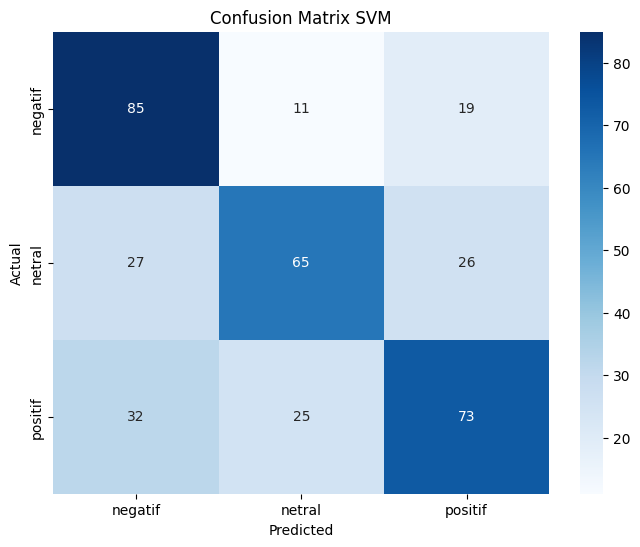

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')
plt.show()

In [18]:
import json

# Prepare data to export
tuning_results = {
    "best_params": grid_search_svm.best_params_,
    "best_score": grid_search_svm.best_score_
}

# Export to a JSON file
with open('svm_hyperparameter_tuning_results.json', 'w') as file:
    json.dump(tuning_results, file, indent=4)

print("Hyperparameter tuning results exported successfully.")

Hyperparameter tuning results exported successfully.


In [14]:
# Inisialisasi model SVM
svm_model_basic = SVC(kernel='linear', C=1)

# Latih model menggunakan data latih
svm_model_basic.fit(X_train, y_train)

# Cetak hasil pelatihan
print("Model SVM berhasil dilatih.")

Model SVM berhasil dilatih.


In [15]:
from sklearn.metrics import classification_report, accuracy_score

# Prediksi data uji
y_pred = svm_model_basic.predict(X_test)

# Evaluasi performa model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5977961432506887
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.71      0.63       115
           1       0.66      0.58      0.62       118
           2       0.59      0.51      0.55       130

    accuracy                           0.60       363
   macro avg       0.60      0.60      0.60       363
weighted avg       0.60      0.60      0.60       363

